#### Detect cycle in an undirected graph

Given an undirected graph, The task is to check if there is a cycle in the given graph.

Input: N = 4, E = 4

Output: Yes 

Explanation: The diagram clearly shows a cycle 0 to 2 to 1 to 0

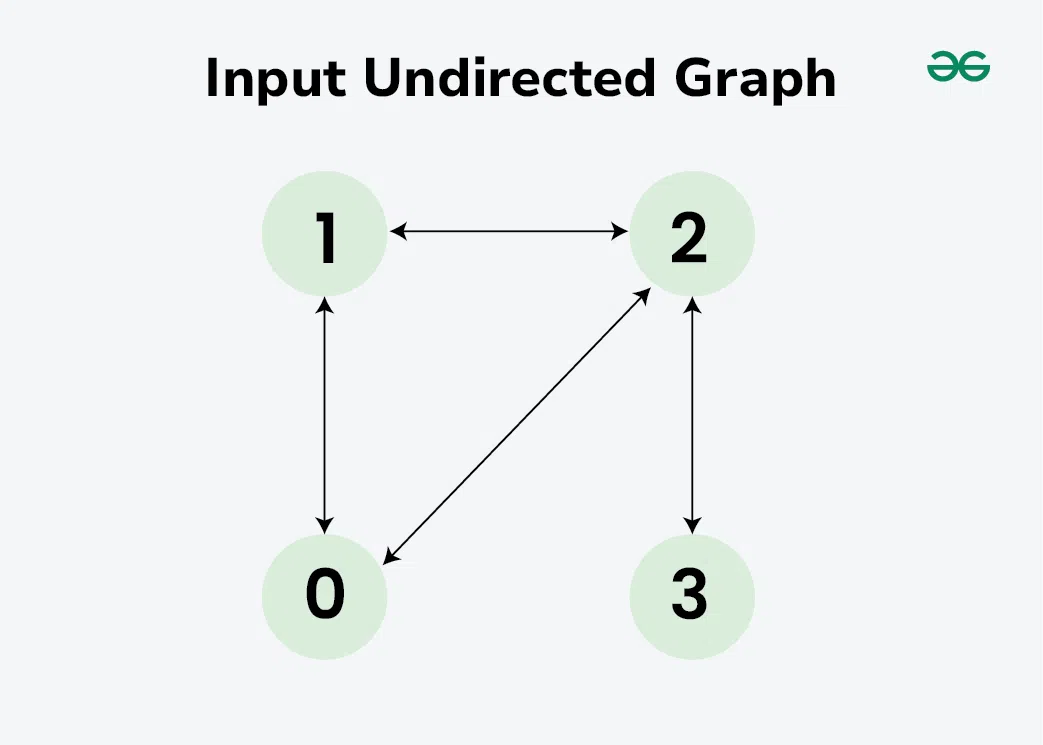

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/Input-Undirected-Graph.jpeg")

Input: N = 4, E = 3

Output: No 

Explanation: There is no cycle in the given graph.

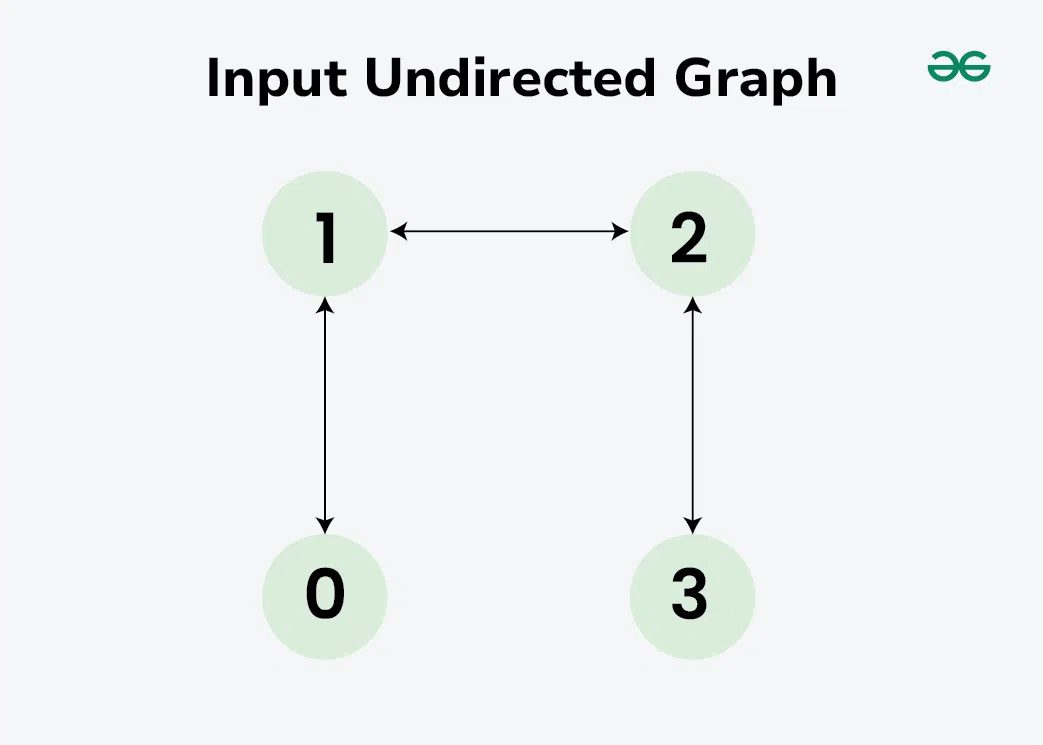

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/Input-Undirected-Graph-2.jpeg")

#### Find cycle in Undirected Graph using DFS:

Use DFS from every unvisited node. Depth First Traversal can be used to detect a cycle in a Graph. There is a cycle in a graph only if there is a back edge present in the graph. A back edge is an edge that is indirectly joining a node to itself (self-loop) or one of its ancestors in the tree produced by DFS. 

To find the back edge to any of its ancestors keep a visited array and if there is a back edge to any visited node then there is a loop and return true.

Follow the below steps to implement the above approach:

- Iterate over all the nodes of the graph and Keep a visited array visited[] to track the visited nodes.
- Run a Depth First Traversal on the given subgraph connected to the current node and pass the parent of the current node. In each recursive 
    - Set visited[root] as 1.
    - Iterate over all adjacent nodes of the current node in the adjacency list 
        - If it is not visited then run DFS on that node and return true if it returns true.
        - Else if the adjacent node is visited and not the parent of the current node then return true.
    - Return false.

##### Illustration:

Below is the graph showing how to detect cycle in a graph using DFS:


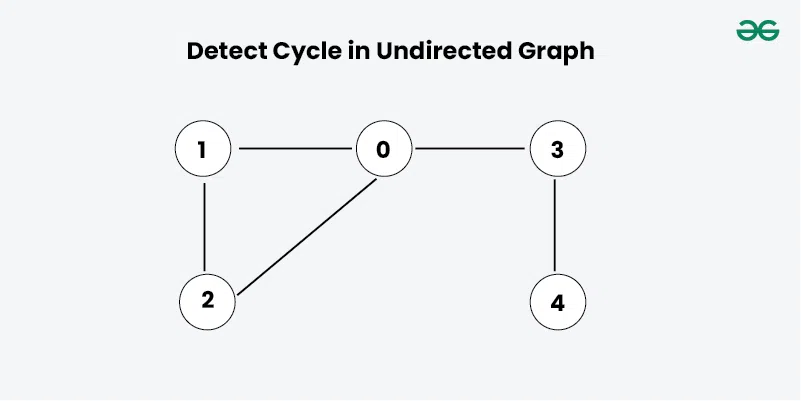

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/11.jpeg")

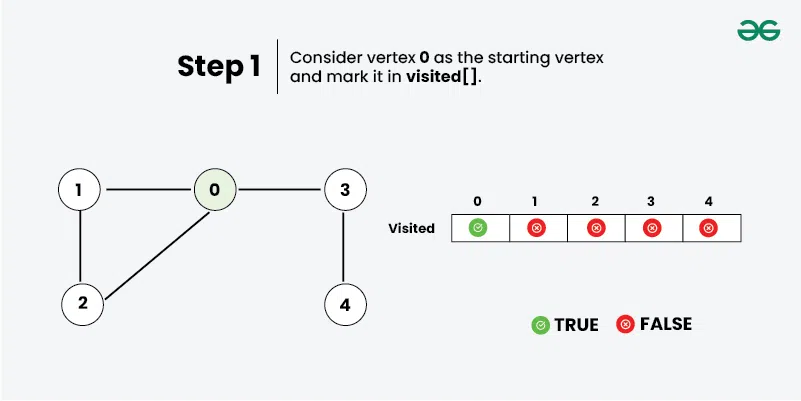

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/12.jpeg")

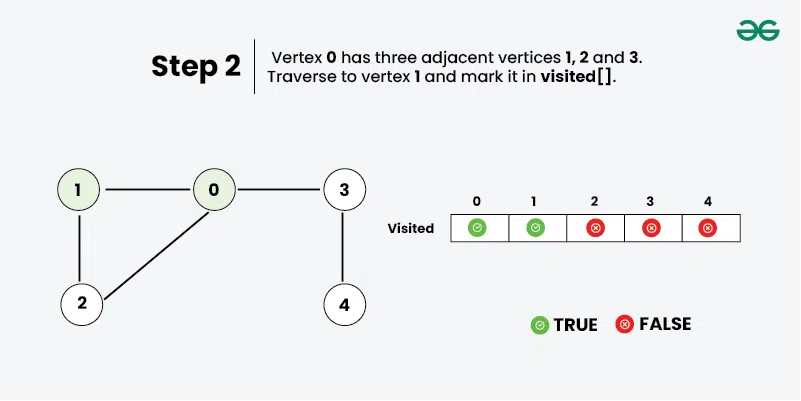

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/13.jpeg")

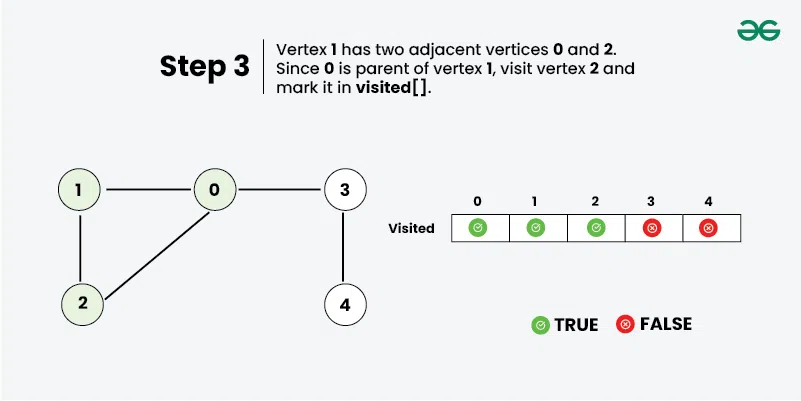

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/14.jpeg")

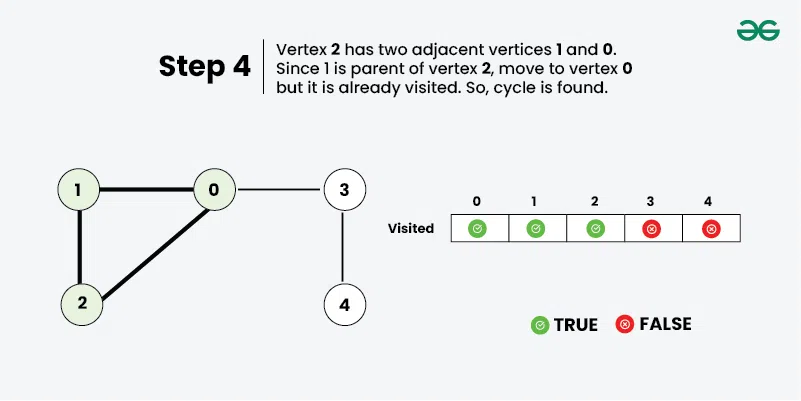

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/15.jpeg")

In [9]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def addEdge(self, v, w):
        self.graph[v].append(w)
        self.graph[w].append(v)

    def isCyclicUtil(self, v, visited, parent):
        visited[v] = True
        for i in self.graph[v]:
            if visited[i] == False:
                if(self.isCyclicUtil(i, visited, v)):
                    return True

            elif parent != i:
                return True

        return False

    def isCyclic(self):
        visited = [False]*(self.V)
        for i in range(self.V):
            if visited[i] == False:
                if(self.isCyclicUtil(i, visited, -1)) == True:
                    return True

        return False

g = Graph(5)
g.addEdge(1, 0)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(0, 3)
g.addEdge(3, 4)

if g.isCyclic():
    print("Graph contains cycle")
else:
    print("Graph doesn't contain cycle ")
g1 = Graph(3)
g1.addEdge(0, 1)
g1.addEdge(1, 2)

if g1.isCyclic():
    print("Graph contains cycle")
else:
    print("Graph doesn't contain cycle ")

Graph contains cycle
Graph doesn't contain cycle 


##### Time Complexity: O(V+E)

The program does a simple DFS Traversal of the graph which is represented using an adjacency list. So the time complexity is O(V+E).

##### Auxiliary Space: O(V)

To store the visited array O(V) space is required.

In [14]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size  

    def add_edge(self, u, v):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = 1
            self.adj_matrix[v][u] = 1

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def print_graph(self):
        print("Adjacency Matrix:")
        for row in self.adj_matrix:
            print(' '.join(map(str, row)))
        print("\nVertex Data:")
        for vertex, data in enumerate(self.vertex_data):
            print(f"Vertex {vertex}: {data}")
            
    def dfs_util(self, v, visited, parent):
        visited[v] = True

        for i in range(self.size):
            if self.adj_matrix[v][i] == 1:
                if not visited[i]:
                    if self.dfs_util(i, visited, v):
                        return True
                elif parent != i:
                    return True
        return False

    def is_cyclic(self):
        visited = [False] * self.size
        for i in range(self.size):
            if not visited[i]:
                if self.dfs_util(i, visited, -1):
                    return True
        return False

g = Graph(7)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(3, 0)  # D - A
g.add_edge(0, 2)  # A - C
g.add_edge(0, 3)  # A - D
g.add_edge(0, 4)  # A - E
g.add_edge(4, 2)  # E - C
g.add_edge(2, 5)  # C - F
g.add_edge(2, 1)  # C - B
g.add_edge(2, 6)  # C - G
g.add_edge(1, 5)  # B - F

g.print_graph()
print("\nGraph has cycle:", g.is_cyclic())

Adjacency Matrix:
0 0 1 1 1 0 0
0 0 1 0 0 1 0
1 1 0 0 1 1 1
1 0 0 0 0 0 0
1 0 1 0 0 0 0
0 1 1 0 0 0 0
0 0 1 0 0 0 0

Vertex Data:
Vertex 0: A
Vertex 1: B
Vertex 2: C
Vertex 3: D
Vertex 4: E
Vertex 5: F
Vertex 6: G

Graph has cycle: True


#### Cycles of length n in an undirected and connected graph:

Given an undirected and connected graph and a number n, count total number of cycles of length n in the graph. A cycle of length n simply means that the cycle contains n vertices and n edges. And we have to count all such cycles that exist. 

Input :  n = 4

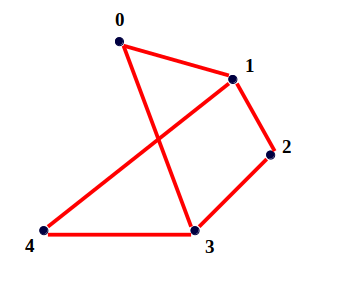

In [11]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/cycle1.png")

Output : Total cycles = 3

Explanation : Following 3 unique cycles 

   0 -> 1 -> 2 -> 3 -> 0

   0 -> 1 -> 4 -> 3 -> 0

   1 -> 2 -> 3 -> 4 -> 1

Note* : There are more cycles but these 3 are unique as 

0 -> 3 -> 2 -> 1 -> 0

0 -> 1 -> 2 -> 3 -> 0 are 

same cycles and hence will be counted as 1.

To solve this Problem, DFS(Depth First Search) can be effectively used. Using DFS we find every possible path of length (n-1) for a particular source (or starting point). Then we check if this path ends with the vertex it started with, if yes then we count this as the cycle of length n. Notice that we looked for path of length (n-1) because the nth edge will be the closing edge of cycle.

Every possible path of length (n-1) can be searched using only V – (n – 1) vertices (where V is the total number of vertices). 
For above example, all the cycles of length 4 can be searched using only 5-(4-1) = 2 vertices. The reason behind this is quite simple, because we search for all possible path of length (n-1) = 3 using these 2 vertices which include the remaining 3 vertices. So, these 2 vertices cover the cycles of remaining 3 vertices as well, and using only 3 vertices we can’t form a cycle of length 4 anyways. 

One more thing to notice is that, every vertex finds 2 duplicate cycles for every cycle that it forms. For above example 0th vertex finds two duplicate cycle namely 0 -> 3 -> 2 -> 1 -> 0 and 0 -> 1 -> 2 -> 3 -> 0. Hence the total count must be divided by 2 because every cycle is counted twice.

In [13]:
V = 5
def DFS(graph, marked, n, vert, start, count):
	marked[vert] = True
	if n == 0: 
		marked[vert] = False
		if graph[vert][start] == 1:
			count = count + 1
			return count
		else:
			return count

	for i in range(V):
		if marked[i] == False and graph[vert][i] == 1:
			count = DFS(graph, marked, n-1, i, start, count)
	marked[vert] = False
	return count

def countCycles( graph, n):
	marked = [False] * V 
	count = 0
	for i in range(V-(n-1)):
		count = DFS(graph, marked, n-1, i, i, count)
		marked[i] = True
	
	return int(count/2)

graph = [[0, 1, 0, 1, 0],
		[1 ,0 ,1 ,0, 1],
		[0, 1, 0, 1, 0],
		[1, 0, 1, 0, 1],
		[0, 1, 0, 1, 0]]
		
n = 4
print("Total cycles of length ",n," are ",countCycles(graph, n))

Total cycles of length  4  are  3


##### Time Complexity: O(V*V)

##### Space Complexity: O(V)

#### Union-Find Cycle Detection:

Union-Find cycle detection is implemented using the adjacency matrix representation

Union-Find cycle detection works by first putting each node in its own subset (like a bag or container). Then, for every edge, the subsets belonging to each vertex are merged. For an edge, if the vertices already belong to the same subset, it means that we have found a cycle.

Union-Find cycle detection explores the edges in the Graph. As edges are explored, the subset of vertex A grows to also include vertices B, C, and D. The cycle is detected when the edge between A and D is explored, and it is discovered that both A and D already belong to the same subset.


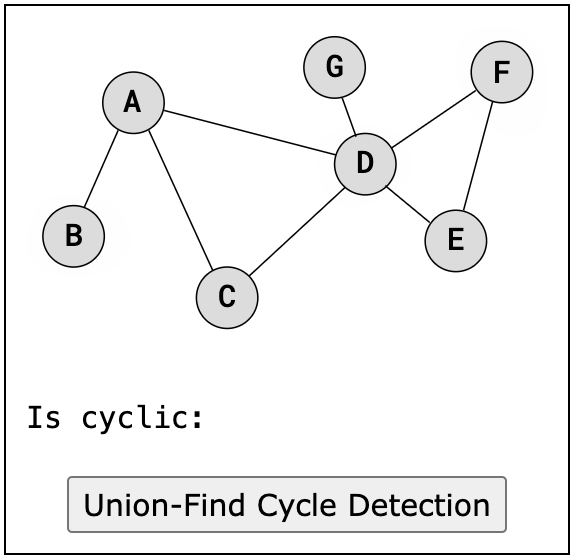

In [15]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/union-cycle.png")

In [16]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size
        self.parent = [i for i in range(size)]  # Union-Find array

    def add_edge(self, u, v):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = 1
            self.adj_matrix[v][u] = 1

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def find(self, i):
        if self.parent[i] == i:
            return i
        return self.find(self.parent[i])

    def union(self, x, y):
        x_root = self.find(x)
        y_root = self.find(y)
        print('Union:',self.vertex_data[x],'+',self.vertex_data[y])
        self.parent[x_root] = y_root
        print(self.parent,'\n')

    def is_cyclic(self):
        for i in range(self.size):
            for j in range(i + 1, self.size):
                if self.adj_matrix[i][j]:
                    x = self.find(i)
                    y = self.find(j)
                    if x == y:
                        return True
                    self.union(x, y)
        return False

g = Graph(7)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(1, 0)  # B - A
g.add_edge(0, 3)  # A - D
g.add_edge(0, 2)  # A - C
g.add_edge(2, 3)  # C - D
g.add_edge(3, 4)  # D - E
g.add_edge(3, 5)  # D - F
g.add_edge(3, 6)  # D - G
g.add_edge(4, 5)  # E - F

print("Graph has cycle:", g.is_cyclic())

Union: A + B
[1, 1, 2, 3, 4, 5, 6] 

Union: B + C
[1, 2, 2, 3, 4, 5, 6] 

Union: C + D
[1, 2, 3, 3, 4, 5, 6] 

Graph has cycle: True
